### 2023/10/23
### 次元圧縮手法「Auto Encoder」のテスト
### 参考：https://datachemeng.com/dcekit/
### 　　：https://qiita.com/takuto512/items/369d530b72b47118f35c#%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E6%BA%96%E5%82%99

In [1]:
from preprocess_data import PreprocessData
import pandas as pd
import keras
import matplotlib.pyplot as plt

import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import os
from matplotlib import cm

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

from keras import backend as K
from keras.models import Sequential, Model, clone_model
from keras.layers import Activation, Dense, Dropout, Conv2D,MaxPooling2D,UpSampling2D
from keras import callbacks

from keras.layers import BatchNormalization, Input, Lambda
from keras import regularizers
from keras.losses import mse, binary_crossentropy

In [2]:
drawing_info = pd.read_excel('../data/all_drawing_data_plus_rotatetype.xlsx')
drawing_date = pd.read_excel('../data/date_all_member.xlsx')

# 0°  井原さん 紙箱 2回目 反転 & 平行移動
data_0 = PreprocessData('http://skill.shinshu-u.ac.jp/2013/5-13/20130513140841_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        0)
# 180°  井原さん 紙箱 1回目 加工なし
data_180 = PreprocessData('http://skill.shinshu-u.ac.jp/2013/4-18/20130417140951_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        180)
# 90°  井原さん 紙袋 1回目 加工なし
data_90 = PreprocessData('http://skill.shinshu-u.ac.jp/2013/6-10/20130610135043_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        90)
# 270°  高田さん 紙袋 2回目 反転 & 平行移動
data_270 = PreprocessData('http://skill.shinshu-u.ac.jp/2013/6-24/20130624115420_18-4-0-0-0_strokes.txt/strokes/pointlists',
                        270)

In [3]:
# data_180.draw_binstroke(0)
data_90.df_drop_point

,time,max_points,shape_str,pressure_avg,shape_int,len_mm,ptx_mm,pty_mm,is_point,140*140_img,140*140_img_vector
2,9,5,Straight,45.6,1,36.396059,"[83.36250000000001, 93.525, 104.775, 114.7125,...","[145.725, 143.8875, 141.48749999999998, 139.23...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,9,10,Straight,100.8,1,132.616380,"[199.3875, 200.0625, 197.025, 193.125, 186.75,...","[120.8625, 121.08749999999999, 121.875, 122.81...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,10,3,Straight,56.0,1,8.077788,"[91.6875, 94.80000000000001, 99.375]","[148.575, 147.48749999999998, 146.1]",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5,10,4,Straight,77.5,1,29.014034,"[162.7125, 177.7875, 184.95, 190.5375]","[127.1625, 122.77499999999999, 120.75, 118.949...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
6,12,9,Straight,88.0,1,115.475999,"[92.32500000000002, 95.13750000000002, 102.187...","[137.73749999999998, 137.25, 135.825, 123.0749...",0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...
2252,1204,4,Straight,111.0,1,17.536144,"[173.8125, 173.925, 175.53750000000002, 177.22...","[177.7125, 178.7625, 188.6625, 194.8875]",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2253,1205,5,Straight,122.8,1,65.499039,"[172.2375, 173.5875, 174.6375, 175.7625, 176.8...","[123.1875, 148.04999999999998, 161.5125, 179.5...",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2254,1205,4,Simple curve,91.5,2,57.778264,"[173.4, 174.1875, 174.5625, 174.78750000000002]","[145.95, 144.825, 160.79999999999998, 201.225]",0,"[[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2255,1205,3,Straight,112.0,1,29.659365,"[169.8, 170.025, 173.7]","[171.9375, 173.1375, 201.3375]",0,"[[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [4]:
# fashion_mnist = keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# #正規化
# train_images = (train_images - train_images.min()) / (train_images.max() - train_images.min())
# test_images = (test_images - test_images.min()) / (test_images.max() - test_images.min())
# #チャネル位置の調整
# image_height, image_width = 28, 28
# train_images = train_images.reshape(train_images.shape[0], 28*28)
# test_images = test_images.reshape(test_images.shape[0], 28*28)

# train_images.shape
# test_labels

In [6]:
data = data_90
# train
# train_df = data.df_drop_col_point[data.df_drop_col_point['shape_int'] == 1]
train_df = data.df_drop_point[:1500]

train_org = train_df['140*140_img_vector'].values
train_img = np.array([nd.astype(np.float64) for nd in train_org])

# test
# train_df = data.df_drop_col_point[data.df_drop_col_point['shape_int'] != 1]
test_df = data.df_drop_point[1500:]
test_org = test_df['140*140_img_vector'].values
test_img = np.array([nd.astype(np.float64) for nd in test_org])

In [11]:
model = Sequential()
#エンコーダ
model.add(Dense(36, activation="relu", input_shape=(19600,)))
#デコーダ
model.add(Dense(19600, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                705636    
                                                                 
 dense_5 (Dense)             (None, 19600)             725200    
                                                                 
Total params: 1430836 (5.46 MB)
Trainable params: 1430836 (5.46 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
fit_callbacks = [
    callbacks.EarlyStopping(monitor='val_loss',
                            patience=5,
                            mode='min')
]
# モデルを学習させる
# 正解データにtrain_imagesを用いる
model.fit(train_img, train_img,
          epochs=200,
          batch_size=2024,
          shuffle=True,
          validation_data=(test_img, test_img),
          callbacks=fit_callbacks,
          )

Epoch 1/200
1/1 [==============================] - 1s 1s/step - loss: 0.6932 - val_loss: 0.6924
Epoch 2/200
1/1 [==============================] - 1s 578ms/step - loss: 0.6924 - val_loss: 0.6912
Epoch 3/200
1/1 [==============================] - 1s 517ms/step - loss: 0.6911 - val_loss: 0.6888
Epoch 4/200
1/1 [==============================] - 1s 527ms/step - loss: 0.6883 - val_loss: 0.6840
Epoch 5/200
1/1 [==============================] - 1s 525ms/step - loss: 0.6828 - val_loss: 0.6756
Epoch 6/200
1/1 [==============================] - 0s 497ms/step - loss: 0.6734 - val_loss: 0.6631
Epoch 7/200
1/1 [==============================] - 1s 553ms/step - loss: 0.6594 - val_loss: 0.6459
Epoch 8/200
1/1 [==============================] - 0s 493ms/step - loss: 0.6404 - val_loss: 0.6239
Epoch 9/200
1/1 [==============================] - 0s 496ms/step - loss: 0.6163 - val_loss: 0.5970
Epoch 10/200
1/1 [==============================] - 1s 516ms/step - loss: 0.5871 - val_loss: 0.5655
Epoch 11/200

In [13]:
# テストデータの損失を確認
score = model.evaluate(train_img, train_img, verbose=0)
print('test xentropy:', score)

# テストデータの損失を可視化
score = model.evaluate(test_img, test_img, verbose=0)
print('test xentropy:', score)

test xentropy: 0.07571442425251007
test xentropy: 0.06992103904485703


In [14]:
#次元圧縮するモデル
encoder = clone_model(model)
encoder.compile(optimizer="adam", loss="binary_crossentropy")
encoder.set_weights(model.get_weights())
#最後のレイヤーを削除
encoder.pop()

IndexError: index 10 is out of bounds for axis 0 with size 10

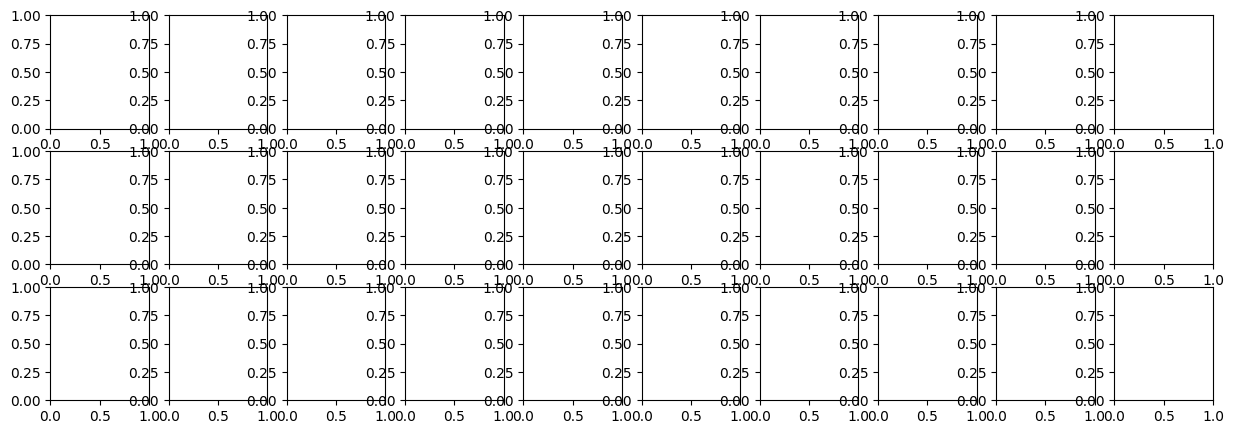

In [17]:
# テストデータから10点選んで可視化

p = [ i for i in range(10, 20)]
x_test_sampled = test_img[p]

# 選びだしたサンプルを AutoEncoder にかける
x_test_sampled_pred = model.predict(x_test_sampled, verbose=0)
# encoderのみにかける
x_test_sampled_enc = encoder.predict(x_test_sampled, verbose=0)

# 処理結果を可視化する
fig, ax = plt.subplots(3, 10, figsize=[15, 5])
for i in p:
    # 元画像
    img = x_test_sampled[i].reshape(140, 140)
    ax[0][i].imshow(img, cmap=cm.gray_r)
    ax[0][i].axis('off')
    # AutoEncoder で次元圧縮した画像
    enc_img = x_test_sampled_enc[i].reshape(6, 6)
    ax[1][i].imshow(enc_img, cmap=cm.gray_r)
    ax[1][i].axis('off')
    # AutoEncoder で復元した画像
    pred_img = x_test_sampled_pred[i].reshape(140, 140)
    ax[2][i].imshow(pred_img, cmap=cm.gray_r)
    ax[2][i].axis('off')

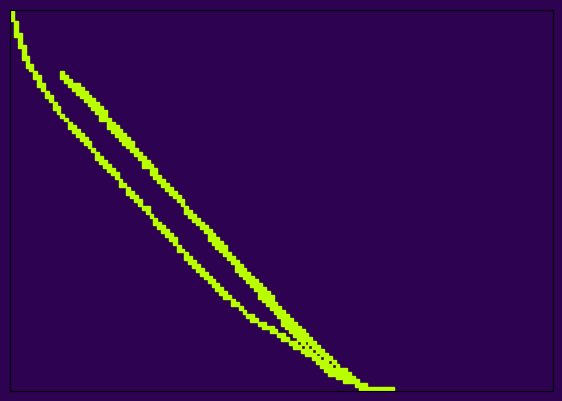

In [66]:
data = data_270
num = 22
data.draw_stroke_px(data.df_dropcol[num:num+1])